
Random Forest with 10 trees:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



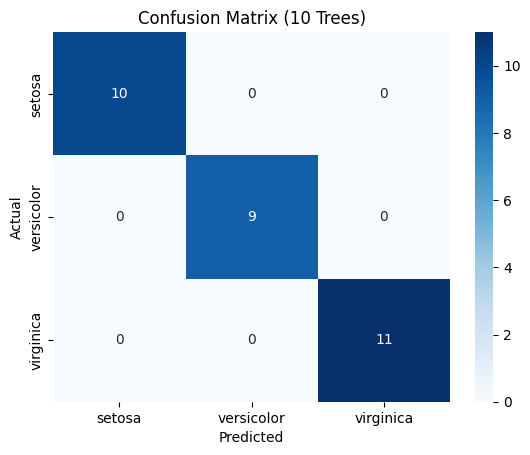

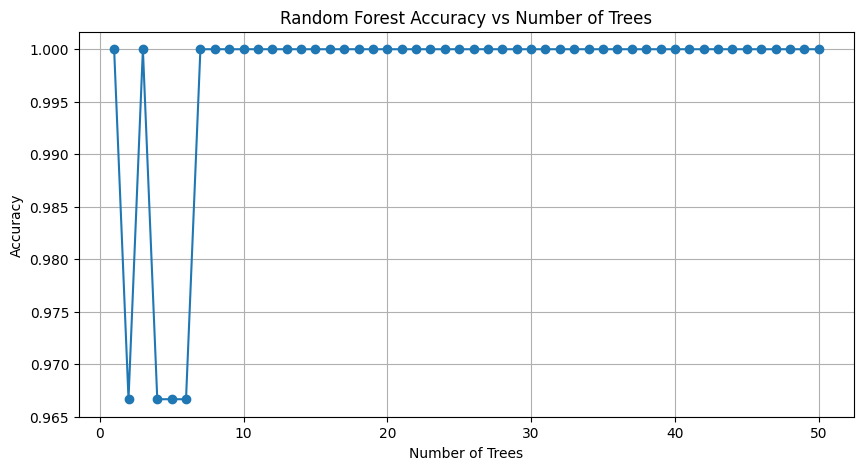


Best Accuracy: 1.00 using 1 trees


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load dataset
iris = pd.read_csv("iris.csv")

# Step 2: Features and labels
X = iris.drop(columns='species')
y = iris['species']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train RF with default n_estimators=10
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred = rf_default.predict(X_test)

print("\nRandom Forest with 10 trees:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_default.classes_, yticklabels=rf_default.classes_)
plt.title("Confusion Matrix (10 Trees)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: Fine tune number of trees
scores = []
trees_range = range(1, 51)

for n in trees_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    scores.append(score)

# Step 7: Plot results
plt.figure(figsize=(10, 5))
plt.plot(trees_range, scores, marker='o')
plt.title("Random Forest Accuracy vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Step 8: Best score and corresponding number of trees
best_n = trees_range[scores.index(max(scores))]
print(f"\nBest Accuracy: {max(scores):.2f} using {best_n} trees")
